# Using SAGE

This notebook shows how to use SAGE to identify author-specific keywords, using a dataset in the format of word count statistics. The dataset is from [Ted Underwood](https://tedunderwood.com/open-data/), and the relevant subsets are included as [releases](https://github.com/jacobeisenstein/SAGE/releases/tag/data) in this repository.

If you use SAGE, please cite [the paper](http://www.icml-2011.org/papers/534_icmlpaper.pdf):

```Eisenstein, Jacob, Amr Ahmed, and Eric P. Xing. "Sparse Additive Generative Models of Text." Proceedings of the 28th International Conference on Machine Learning (ICML-11). 2011.```

In [5]:
import sage
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

First we build word count dictionaries from each file

In [35]:
def getCountDict(filename):
    with open(filename) as fin:
        return {word:int(count) for word,count in [line.rstrip().split() for line in fin.readlines()]}

In [40]:
def getCountDict2(filename):
    count_dict = dict()
    df = pd.read_csv(filename, low_memory=False, lineterminator="\n")
    df = df.sort_values(by=["word"])
    words = list(df["word"])
    counts = list(df["file_count"])
    for i in range(len(words)):
        count_dict[words[i]] = counts[i]
    return count_dict

In [44]:
# counts for author Lydia Maria Child
# child_counts = getCountDict('data/output.tsv')
# counts for all 1840s letters in the corpus 
# base_counts = getCountDict('data/underwood-1840s-let-counts.tsv')
good_counts = getCountDict2('data/input_good.csv')
bad_counts = getCountDict2('data/input_bad.csv')

Build a vocabulary of the most common terms

In [45]:
vocab = [word for word,count in Counter(good_counts).most_common(5000)]

Convert the counts into [numpy](http://www.numpy.org/) arrays

In [46]:
x_child = np.array([good_counts[word] for word in vocab])
x_base = np.array([bad_counts[word] for word in vocab]) + 1.

KeyError: 'covid19'

Compute the base log-probabilities of each word

In [47]:
mu = np.log(x_base) - np.log(x_base.sum())

NameError: name 'x_base' is not defined

Run SAGE

In [9]:
eta = sage.estimate(x_child,mu)

Print words that are especially frequent in the writing of Lydia Maria Child, compared to the baseline.

In [11]:
print(sage.topK(eta,vocab))

['soul', 'heart', 'beauty', 'thou', 'sea', 'outward', 'graceful', 'mother', 'souls', 'human']


Print words that are especially infrequent in her writing, compared to the baseline.

In [12]:
print(sage.topK(-eta,vocab))

['america', 'hardly', 'extent', 'democratic', 'states', 'population', 'parties', 'falls', 'americans', 'interests']


A histograph of SAGE coefficients. The spike at zero is because SAGE is biased towards sparsity.

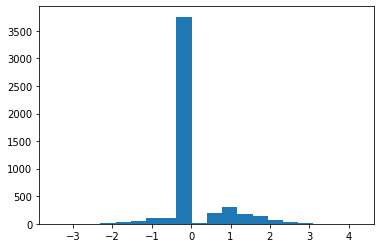

In [13]:
plt.hist(eta,20);

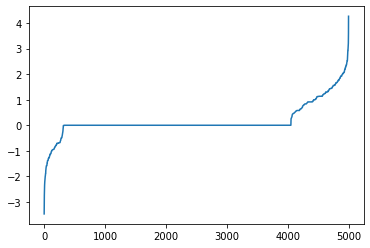

In [14]:
plt.plot(sorted(eta));